### **Optimasi Rute Pengiriman Barang (Traveling Salesman Problem - TSP)**

Bayangkan Anda memiliki perusahaan pengiriman dan perlu mengirim paket ke beberapa lokasi dalam satu hari. Tantangannya adalah menemukan rute terpendek untuk mengunjungi semua lokasi dan kembali ke titik awal (depot). Ini dikenal sebagai Traveling Salesman Problem (TSP).

### **Langkah-Langkah Genetic Algorithm dalam TSP:**

1. **Inisialisasi Populasi:**
   - Setiap individu (kromosom) dalam populasi merepresentasikan urutan rute yang diambil oleh kurir untuk mengunjungi semua lokasi. Misalnya, jika ada 5 lokasi yang harus dikunjungi, satu kromosom mungkin terlihat seperti: `[2, 3, 1, 5, 4]`.

2. **Evaluasi Fitness:**
   - Fitness function mengukur total jarak yang ditempuh untuk urutan lokasi tersebut. Semakin kecil jaraknya, semakin tinggi nilai fitness-nya.

3. **Seleksi:**
   - Pilih individu yang memiliki total jarak lebih pendek (fitness lebih tinggi) untuk menjadi orang tua bagi generasi berikutnya.

4. **Crossover (Rekombinasi):**
   - Dua individu dipilih sebagai orang tua, dan bagian dari rute mereka dipertukarkan untuk menghasilkan keturunan baru. Misalnya, dari dua rute `[2, 3, 1, 5, 4]` dan `[1, 5, 3, 2, 4]`, anak baru mungkin adalah `[2, 3, 5, 1, 4]`.

5. **Mutasi:**
   - Mutasi dapat dilakukan dengan menukar dua lokasi secara acak dalam rute. Misalnya, `[2, 3, 5, 1, 4]` bisa dimutasi menjadi `[2, 3, 4, 1, 5]`.

6. **Penggantian:**
   - Generasi baru menggantikan yang lama, dan proses ini diulang sampai menemukan rute dengan jarak terpendek.

### **Contoh Implementasi Python untuk TSP:**

Misalkan kita memiliki 5 kota dengan koordinat sebagai berikut:

- Kota 1: (0, 0)
- Kota 2: (1, 3)
- Kota 3: (4, 3)
- Kota 4: (6, 1)
- Kota 5: (3, 0)

Kita akan menggunakan GA untuk menemukan rute terpendek untuk mengunjungi semua kota.

In [1]:
import random
import numpy as np

In [20]:
# Koordinat kota
N = 4
# cities = np.array([
#     [0, 0],
#     [1, 3],
#     [4, 3],
#     [6, 1],
#     [3, 0]
# ])
cities = np.random.randint(1, 100, size=(N, 2))
cities

array([[58, 11],
       [ 2, 31],
       [59, 35],
       [ 9, 66]])

In [21]:
names_of_cities = np.arange(N)
names_of_cities

array([0, 1, 2, 3])

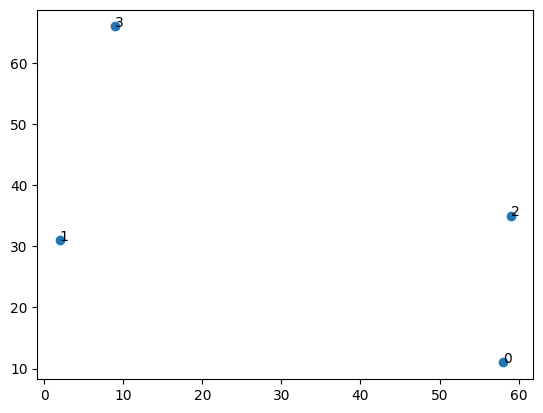

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter( cities[:,0], cities[:,1])
for i, txt in enumerate(names_of_cities):
    ax.annotate(txt, (cities[:,0][i], cities[:,1][i]))

In [13]:
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

In [14]:
from itertools import permutations

def brute_force():
    population = permutations(names_of_cities)
    best_solution = min(population, key=lambda x: total_distance(x))
    return best_solution, total_distance(best_solution)

In [23]:
import time

start = time.time()
print(brute_force())
exec_time = (time.time()-start)
print(exec_time)

((np.int64(0), np.int64(1), np.int64(3), np.int64(2)), np.float64(178.00850020368307))
0.0018649101257324219


In [8]:
def total_distance(route):
    dist = 0
    for i in range(len(route)):
        dist += distance(cities[route[i]], cities[route[(i + 1) % len(route)]])
    return dist

In [23]:
def fitness(route):
    return 1 / total_distance(route)

In [24]:
def selection(population, fitness_values):
    return random.choices(population, weights=fitness_values, k=2)

In [25]:
def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child1 = parent1[start:end]
    child2 = [city for city in parent2 if city not in child1]
    return child1 + child2

In [26]:
def mutate(route, mutation_rate=0.01):
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route) - 1)
            route[i], route[j] = route[j], route[i]
    return route

In [32]:
def genetic_algorithm(population_size=100, generations=1000, mutation_rate=0.01):
    population = [random.sample(range(len(cities)), len(cities)) for _ in range(population_size)]
    print(f'population: {population}')
    for generation in range(generations):
        fitness_values = [fitness(individual) for individual in population]
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = selection(population, fitness_values)
            offspring1, offspring2 = crossover(parent1, parent2), crossover(parent2, parent1)
            new_population.append(mutate(offspring1, mutation_rate))
            new_population.append(mutate(offspring2, mutation_rate))
        population = new_population
    best_solution = min(population, key=lambda x: total_distance(x))
    return best_solution, total_distance(best_solution)

In [33]:
# Menjalankan Genetic Algorithm untuk TSP
import time

start = time.time()

best_route, best_distance = genetic_algorithm()
print(f"Rute Terbaik: {best_route} dengan jarak: {best_distance}")

exec_time = (time.time()-start)
print(exec_time)

population: [[8, 2, 6, 0, 1, 3, 9, 4, 7, 5], [6, 2, 1, 7, 4, 5, 3, 0, 8, 9], [7, 3, 9, 0, 4, 2, 6, 1, 5, 8], [8, 6, 4, 9, 7, 2, 0, 3, 1, 5], [6, 2, 8, 9, 1, 4, 3, 5, 0, 7], [7, 0, 9, 3, 5, 2, 8, 1, 6, 4], [8, 2, 1, 6, 5, 0, 3, 9, 4, 7], [1, 0, 4, 3, 6, 9, 2, 5, 7, 8], [8, 5, 0, 4, 2, 3, 6, 7, 1, 9], [2, 1, 5, 6, 0, 8, 4, 9, 3, 7], [4, 2, 5, 0, 9, 7, 1, 6, 8, 3], [1, 5, 6, 2, 7, 9, 3, 0, 8, 4], [5, 3, 9, 4, 2, 8, 7, 1, 0, 6], [7, 3, 2, 8, 6, 0, 4, 5, 9, 1], [7, 0, 3, 4, 5, 8, 6, 1, 9, 2], [0, 1, 6, 8, 3, 5, 4, 2, 7, 9], [7, 5, 9, 3, 4, 8, 0, 2, 1, 6], [6, 4, 8, 3, 9, 7, 1, 0, 5, 2], [0, 6, 4, 9, 1, 7, 3, 5, 2, 8], [9, 5, 8, 2, 7, 4, 6, 0, 1, 3], [8, 4, 2, 9, 5, 3, 7, 1, 0, 6], [9, 3, 2, 0, 5, 7, 6, 1, 8, 4], [3, 6, 9, 7, 1, 0, 8, 4, 5, 2], [2, 3, 6, 9, 5, 7, 4, 8, 1, 0], [1, 4, 7, 8, 2, 0, 6, 5, 9, 3], [2, 4, 6, 9, 0, 1, 7, 8, 5, 3], [1, 4, 3, 0, 6, 9, 7, 8, 2, 5], [4, 3, 6, 0, 1, 9, 2, 8, 5, 7], [4, 3, 1, 9, 6, 5, 2, 8, 7, 0], [5, 6, 8, 2, 3, 7, 1, 4, 0, 9], [8, 9, 7, 1, 4, 6, 2, 5, 0,

**Penjelasan Kode:**

- **Koordinat Kota:** Setiap kota memiliki koordinat tertentu, yang memungkinkan kita menghitung jarak antara dua kota menggunakan fungsi `distance`.
- **Fitness Function:** Fitness function dalam kasus ini adalah kebalikan dari total jarak. Semakin pendek rutenya, semakin tinggi fitness-nya.
- **Seleksi dan Crossover:** Dua individu dipilih untuk rekombinasi dan menghasilkan keturunan baru yang mencerminkan rute gabungan.
- **Mutasi:** Mutasi dilakukan dengan menukar posisi dua kota secara acak untuk memperkenalkan variasi.

**Hasilnya:**
GA akan mencoba menemukan rute dengan jarak terpendek yang memungkinkan kurir untuk mengunjungi semua kota dan kembali ke kota awal.

**Aplikasi Praktis:**
Penggunaan GA dalam kasus ini bisa diterapkan dalam logistik untuk mengoptimalkan rute pengiriman, yang menghemat waktu dan biaya. GA juga dapat digunakan untuk berbagai aplikasi lain seperti penjadwalan, desain jaringan, dan bahkan optimasi dalam keuangan.